In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statistics import variance, stdev # for doing statistical analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-csv/loan_data.csv
/kaggle/input/loan-dataset-notebook/loan_data.csv


In [2]:
loan=pd.read_csv('/kaggle/input/loan-data-csv/loan_data.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [5]:
#creating a dataset copy
df = loan.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### Data Sanity Checks

In [6]:
#get the shape of the data-The data has 381 rows and 13 columns
loan.shape

(381, 13)

In [7]:
#checking missing values
    #The columns with missing values in our dataset include:
    #Gender: 5
    #Dependants: 8
    #Self_Employed: 21
    #Loan_Amount_Term: 11
    #Credit_History: 30(Highest
                   
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#checking for duplicates-There are no duplicates in the dataset
loan.duplicated().sum()

0

In [9]:
#The dataset has the following datatypes:
    #float: 4 columns
    #Integers: 1 column
    #Object(string): 8 columns

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [10]:
#descriptive statistics of the numerical columns
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [11]:
#descriptive statistics of the obejct columns
loan.describe(include = 'object').T

,count,unique,top,freq
Loan_ID,381,381,LP001003,1
Gender,376,2,Male,291
Married,381,2,Yes,228
Dependents,373,4,0,234
Education,381,2,Graduate,278
Self_Employed,360,2,No,325
Property_Area,381,3,Semiurban,149
Loan_Status,381,2,Y,271


### Univariate Analysis

In [12]:
#The property area is divided into 3:
    #SemiUrban: 149
    #Urban: 126
    #Rural: 106
loan['Property_Area'].value_counts()

Property_Area
Semiurban    149
Urban        126
Rural        106
Name: count, dtype: int64

In [13]:
#From the loan applicants, 278 are graduates while 103 have not graduated
loan['Education'].value_counts()

Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64

In [14]:
#The dependent variable
loan['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [15]:
#271 people were given a loan while 110 were not
loan['Loan_Status'].value_counts()

Loan_Status
Y    271
N    110
Name: count, dtype: int64

In [16]:
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

### Plots

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'A plot showing the distribution of the loan amount term')

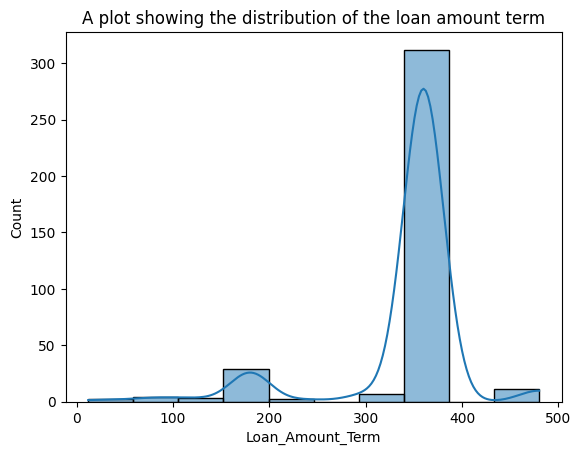

In [17]:
#A histogram
sns.histplot(loan, x = 'Loan_Amount_Term', kde = True)
plt.title("A plot showing the distribution of the loan amount term")

Text(0.5, 1.0, 'A plot showing the distribution of the loan amount term')

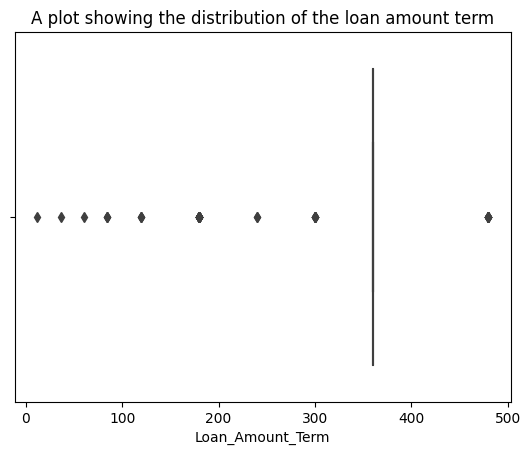

In [18]:
#a boxplot
sns.boxplot(loan, x = 'Loan_Amount_Term')
plt.title("A plot showing the distribution of the loan amount term")

In [19]:
med1= loan['Loan_Amount_Term'].median()
med1

360.0

In [20]:
#for confirmation
med2 = np.nanmedian(loan['Loan_Amount_Term'])
med2

360.0

In [21]:
mean1 = loan['Loan_Amount_Term'].mean()
mean1

340.86486486486484

In [22]:
mean2 = np.mean(loan['Loan_Amount_Term'])
mean2

340.86486486486484

In [23]:
mod1 = loan['Loan_Amount_Term'].mode()
mod1

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [24]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [25]:
#filling the missing values
loan.fillna({'Loan_Amount_Term': med1}, inplace = True)
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'A plot showing credit history')

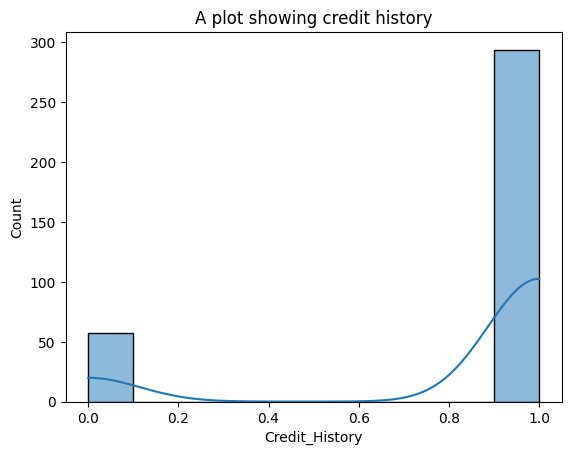

In [26]:
#histogram of credit history
sns.histplot(loan, x = 'Credit_History', kde = True )
plt.title("A plot showing credit history")

In [27]:
med_ced = loan['Credit_History'].median()
med_ced

1.0

In [28]:
med_mean = loan['Credit_History'].mean()
med_mean

0.8376068376068376

In [29]:
med_mode = loan['Credit_History'].mode()
med_mode

0    1.0
Name: Credit_History, dtype: float64

In [30]:
#filling in the missing values
loan.fillna({'Credit_History': med_ced}, inplace = True)
loan.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
#get the mode
mod1 = loan['Gender'].mode()
mod1[0]

mode2 = loan['Self_Employed'].mode()
print(mode2[0])

No


In [32]:
#filling the missing values in the two columns
loan.fillna({'Gender': mod1[0],'Self_Employed': mode2[0]}, inplace = True)
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           8
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
mod3 = loan['Dependents'].mode()
loan.fillna({'Dependents': mod3[0]},inplace = True)


In [34]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,381.0,341.417323,67.625957,12.0,360.0,360.0,360.0,480.0
Credit_History,381.0,0.850394,0.357154,0.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'A plot showing the ApplicantIncome column')

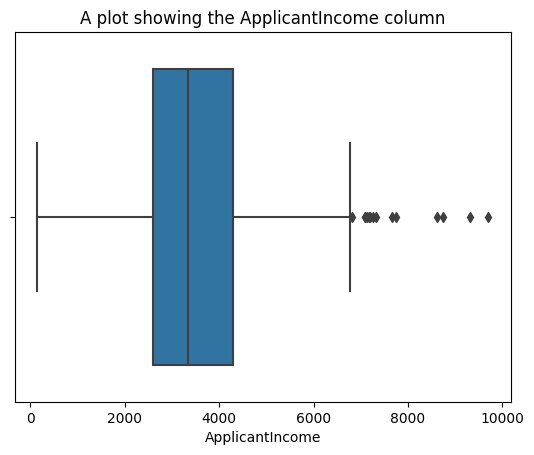

In [35]:
sns.boxplot(data = loan, x = 'ApplicantIncome')
plt.title("A plot showing the ApplicantIncome column")

Text(0.5, 1.0, 'A plot showing the LoanAmount column')

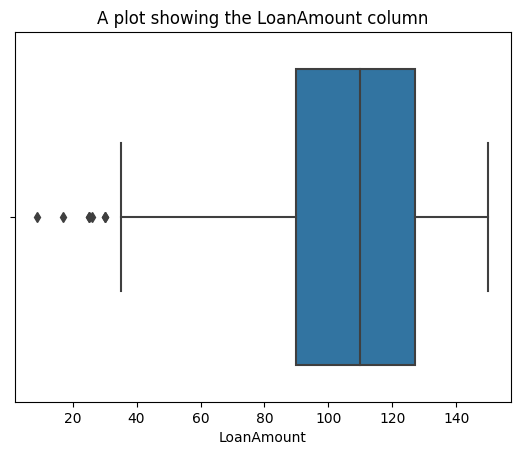

In [36]:
sns.boxplot(data = loan, x = 'LoanAmount')
plt.title("A plot showing the LoanAmount column")

In [37]:
#how to remove outliers in a columns
q1 = loan['LoanAmount'].quantile(0.25)
print(q1)
q3 = loan['LoanAmount'].quantile(0.75)
print(q3)

90.0
127.0


In [38]:
IQR = q3 - q1
print(IQR)

37.0


In [39]:
#lower boundary
# q1 - 1.5 * iqr
#upper boundary
#q3 + 1.5 * iqr

In [40]:
lower_boundary = q1 - 1.5 * IQR
print(lower_boundary)

34.5


In [41]:
upper_boundary = q3 + 1.5 * IQR
print(upper_boundary)

182.5


In [42]:
outliers2 = df[(df['LoanAmount'] < q1) | (df['LoanAmount'] > q3)]
outliers2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [43]:
#getting the outliers
outliers = loan[(loan['LoanAmount'] < lower_boundary)|(loan['LoanAmount'] > upper_boundary)]
print(outliers)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
8    LP001030    Male     Yes          2      Graduate            No   
65   LP001325    Male      No          0  Not Graduate            No   
84   LP001482    Male     Yes          0      Graduate           Yes   
91   LP001518    Male     Yes          1      Graduate            No   
168  LP001888  Female      No          0      Graduate            No   
350  LP002792    Male     Yes          1      Graduate            No   
357  LP002840  Female      No          0      Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
8               1299             1086.0        17.0             120.0   
65              3620                0.0        25.0             120.0   
84              3459                0.0        25.0             120.0   
91              1538             1425.0        30.0             360.0   
168             3237                0.0        30.0       

In [44]:
loan_clean1 = loan[(loan['LoanAmount']>= lower_boundary) & (loan['LoanAmount']<= upper_boundary)]

In [45]:
outlier_loan_amounts = outliers['LoanAmount']
print(outlier_loan_amounts)

8      17.0
65     25.0
84     25.0
91     30.0
168    30.0
350    26.0
357     9.0
Name: LoanAmount, dtype: float64


In [46]:
loan_clean1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


Text(0.5, 1.0, 'A plot showing the LoanAmount column')

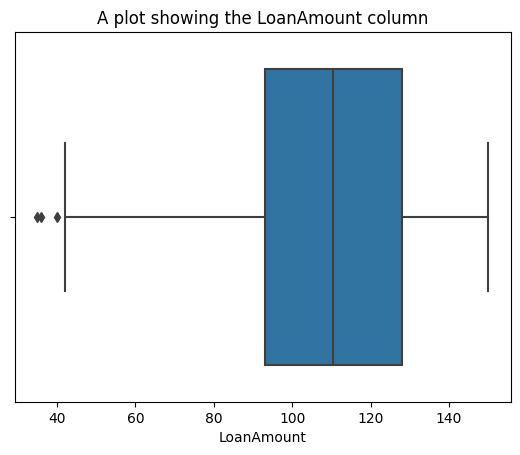

In [47]:
sns.boxplot(data = loan_clean1, x = 'LoanAmount')
plt.title("A plot showing the LoanAmount column")

In [48]:
#change categorical variables to numeric vairables
loan_clean1.describe(include = "object").T

,count,unique,top,freq
Loan_ID,374,374,LP001003,1
Gender,374,2,Male,291
Married,374,2,Yes,224
Dependents,374,4,0,238
Education,374,2,Graduate,272
Self_Employed,374,2,No,340
Property_Area,374,3,Semiurban,146
Loan_Status,374,2,Y,265


In [49]:
#creating a labelencoder instance
le = LabelEncoder()
loan_clean1['Gender'] = le.fit_transform(loan_clean1['Gender'])
loan_clean1.head()

/tmp/ipykernel_19/996787238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean1['Gender'] = le.fit_transform(loan_clean1['Gender'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,1,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [50]:
loan_clean1['Gender'].head(15)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
9     1
10    1
11    0
12    1
13    1
14    1
15    1
Name: Gender, dtype: int64

In [51]:
loan_clean1['Married'] = le.fit_transform(loan_clean1['Married'])
loan_clean1.head()

/tmp/ipykernel_19/272858461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean1['Married'] = le.fit_transform(loan_clean1['Married'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,1,1,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [52]:
loan_clean1['Property_Area'] = le.fit_transform(loan_clean1['Property_Area'])
loan_clean1['Property_Area'].head(20)

/tmp/ipykernel_19/2828020510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean1['Property_Area'] = le.fit_transform(loan_clean1['Property_Area'])


0     0
1     2
2     2
3     2
4     2
5     2
6     2
7     0
9     2
10    2
11    2
12    0
13    2
14    2
15    1
16    0
17    1
18    2
19    2
20    1
Name: Property_Area, dtype: int64

In [53]:
loan_clean1['Education'] = le.fit_transform(loan_clean1['Education'])
loan_clean1.head()

/tmp/ipykernel_19/1297837576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean1['Education'] = le.fit_transform(loan_clean1['Education'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,0,N
1,LP001005,1,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,Y
2,LP001006,1,1,0,1,No,2583,2358.0,120.0,360.0,1.0,2,Y
3,LP001008,1,0,0,0,No,6000,0.0,141.0,360.0,1.0,2,Y
4,LP001013,1,1,0,1,No,2333,1516.0,95.0,360.0,1.0,2,Y


In [54]:
loan_clean1['Self_Employed'] = le.fit_transform(loan_clean1['Self_Employed'])
loan_clean1['Loan_Status'] = le.fit_transform(loan_clean1['Loan_Status'])
loan_clean1.head()

/tmp/ipykernel_19/730168157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean1['Self_Employed'] = le.fit_transform(loan_clean1['Self_Employed'])
/tmp/ipykernel_19/730168157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean1['Loan_Status'] = le.fit_transform(loan_clean1['Loan_Status'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [55]:
#getting dummy variables of the dependants column
dummys = pd.get_dummies(loan_clean1['Dependents'], prefix = 'Dependents', drop_first = True)
dummys = dummys.astype(int)

In [56]:
dummys

,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
376,0,0,1
377,0,0,0
378,0,0,0
379,0,0,1


In [57]:
loan_clean1.drop(['Loan_ID', 'Dependents'], axis = 1, inplace = True)
loan_clean1.head()

/tmp/ipykernel_19/189518638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_clean1.drop(['Loan_ID', 'Dependents'], axis = 1, inplace = True)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,1


In [58]:
loan_full = pd.concat([loan_clean1, dummys], axis = 1)
loan_full.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_1,Dependents_2,Dependents_3+
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,0,0,0
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,0,0,0
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0,0,0
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,1,0,0,0


In [59]:
loan = loan_full.copy()

In [60]:
#separating the dependent and independent variables
X = loan_full.drop(['Loan_Status'], axis = 1)
y = loan_full.pop('Loan_Status')

In [61]:
X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
1,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,0,0,0
2,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,0,0,0
3,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,0,0,0
4,1,1,1,0,2333,1516.0,95.0,360.0,1.0,2,0,0,0


In [62]:
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 374, dtype: int64

In [63]:
#scaling the dataset
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
scaled_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_1,Dependents_2,Dependents_3+
0,0.534063,0.818317,-0.612372,-0.316228,0.700039,0.091816,0.818694,0.260936,0.424041,-1.337563,2.545584,-0.428421,-0.284473
1,0.534063,0.818317,-0.612372,3.162278,-0.416722,-0.548331,-1.544247,0.260936,0.424041,1.227814,-0.392837,-0.428421,-0.284473
2,0.534063,0.818317,1.632993,-0.316228,-0.710904,0.452642,0.513798,0.260936,0.424041,1.227814,-0.392837,-0.428421,-0.284473
3,0.534063,-1.222020,-0.612372,-0.316228,1.699691,-0.548331,1.314149,0.260936,0.424041,1.227814,-0.392837,-0.428421,-0.284473
4,0.534063,0.818317,1.632993,-0.316228,-0.887272,0.095212,-0.439001,0.260936,0.424041,1.227814,-0.392837,-0.428421,-0.284473
